In [1]:
import pandas as pd

In [2]:
df_input = pd.read_excel('../SalCIS_ORF.xlsx')

In [3]:
import numpy as np

In [4]:
df_input['FASTA protein sequence'] = df_input['FASTA protein sequence'].str.replace('*','')

In [5]:
df_input = df_input.dropna(axis=0)

In [6]:
df_input.head()

,ORF number,PlotOrder,Given Nomenclature,Size,HHPred predicted/experimental function,FASTA protein sequence
0,1,17,SalCIS16A,22kDa,Cap,MLDLCLNYLKERMNQSVKNVFDLADDLVIVSPPTDLDGSKLPKIQN...
1,2,16,SalCIS16B,29kDa,Cap adaptor,MADYQTILTISVLHEYYNASSDKFAPIGLVADRETVLLLRQYGILL...
2,3,2,SalCIS2,57kDa,Tail sheath tube/protein transport,MGVMKTPGVYIVEQNAFPNSVVEVATAVPAFIGYTEKADNGGKSLS...
3,4,1,SalCIS1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
4,5,5,SalCIS5,17kDa,Inner tube initiator,MVTAKGSGAAQGDGDWPLPAFYFSVSISGCADDTAFQEVSGLEFQI...


In [8]:
fasta_column_header = 'FASTA protein sequence'

In [9]:
import os
import re
import json

In [25]:
df = pd.read_excel('./SALCIS_AF3_all_v_all_results.xlsx').iloc[:,1:]

In [27]:
df['protein2'] = df['protein2'].str.replace('CIS','Cis')
df['protein1'] = df['protein1'].str.replace('CIS','Cis')

In [28]:
df

,main_folder,seed,sample,cif_path,chain_iptm,chain_pair_iptm,chain_pair_pae_min,chain_ptm,fraction_disordered,has_clash,iptm,ptm,ranking_score,pdb_path,pdockq,avg_ipae,protein1,protein2,order_cat
0,salcis1,44,0,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,"[0.07, 0.07]","[[0.64, 0.07], [0.07, 0.66]]","[[0.76, 25.92], [27.92, 0.76]]","[0.64, 0.66]",0.09,0,0.07,0.48,0.20,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,0.018259,26.920,SalCis1,SalCis13,SalCIS1
1,salcis1,44,1,./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed...,"[0.21, 0.21]","[[0.56, 0.21], [0.21, 0.38]]","[[0.76, 24.82], [24.96, 0.76]]","[0.56, 0.38]",0.03,0,0.21,0.37,0.25,./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed...,0.211462,24.890,SalCis1,SalCis14,SalCIS1
2,salcis1,44,3,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,"[0.05, 0.05]","[[0.63, 0.05], [0.05, 0.66]]","[[0.76, 31.02], [31.22, 0.76]]","[0.63, 0.66]",0.09,0,0.05,0.48,0.18,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,0.000000,31.120,SalCis1,SalCis13,SalCIS1
3,salcis1,44,1,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,"[0.06, 0.06]","[[0.61, 0.06], [0.06, 0.67]]","[[0.76, 31.09], [30.82, 0.76]]","[0.61, 0.67]",0.09,0,0.06,0.48,0.19,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,0.257785,30.955,SalCis1,SalCis13,SalCIS1
4,salcis1,33,1,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,"[0.06, 0.06]","[[0.56, 0.06], [0.06, 0.65]]","[[0.76, 29.92], [30.78, 0.76]]","[0.56, 0.65]",0.10,0,0.06,0.47,0.19,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,0.000000,30.350,SalCis1,SalCis13,SalCIS1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,salcis21,83,0,./SalCIS21/output/SalCIS21_SalCIS2/salcis21/se...,"[0.17, 0.17]","[[0.6, 0.17], [0.17, 0.89]]","[[0.76, 12.76], [11.92, 0.76]]","[0.6, 0.89]",0.08,0,0.17,0.74,0.33,./SalCIS21/output/SalCIS21_SalCIS2/salcis21/se...,0.079262,12.340,SalCis21,SalCis2,SalCIS21
8096,salcis21,10,0,./SalCIS21/output/SalCIS21_SalCIS2/salcis21/se...,"[0.26, 0.26]","[[0.6, 0.26], [0.26, 0.89]]","[[0.76, 13.92], [15.22, 0.76]]","[0.6, 0.89]",0.08,0,0.26,0.73,0.40,./SalCIS21/output/SalCIS21_SalCIS2/salcis21/se...,0.375233,14.570,SalCis21,SalCis2,SalCIS21
8097,salcis21,10,1,./SalCIS21/output/SalCIS21_SalCIS2/salcis21/se...,"[0.11, 0.11]","[[0.62, 0.11], [0.11, 0.89]]","[[0.76, 23.95], [25.9, 0.76]]","[0.62, 0.89]",0.08,0,0.11,0.73,0.28,./SalCIS21/output/SalCIS21_SalCIS2/salcis21/se...,0.269662,24.925,SalCis21,SalCis2,SalCIS21
8098,salcis21,44,3,./SalCIS21/output/SalCIS21_SalCIS15/salcis21/s...,"[0.43, 0.43]","[[0.58, 0.43], [0.43, 0.57]]","[[0.76, 2.47], [2.54, 0.76]]","[0.58, 0.57]",0.08,0,0.43,0.47,0.48,./SalCIS21/output/SalCIS21_SalCIS15/salcis21/s...,0.131813,2.505,SalCis21,SalCis15,SalCIS21


In [29]:
df_input['Given Nomenclature'] = df_input['Given Nomenclature'].str.replace('CIS','Cis')

In [30]:
df = pd.merge(df,df_input,left_on='protein1',right_on='Given Nomenclature',how='inner')

In [31]:
df = df.sort_values('PlotOrder')

In [32]:
df

,main_folder,seed,sample,cif_path,chain_iptm,chain_pair_iptm,chain_pair_pae_min,chain_ptm,fraction_disordered,has_clash,...,avg_ipae,protein1,protein2,order_cat,ORF number,PlotOrder,Given Nomenclature,Size,HHPred predicted/experimental function,FASTA protein sequence
0,salcis1,44,0,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,"[0.07, 0.07]","[[0.64, 0.07], [0.07, 0.66]]","[[0.76, 25.92], [27.92, 0.76]]","[0.64, 0.66]",0.09,0,...,26.920,SalCis1,SalCis13,SalCIS1,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
307,salcis1,61,2,./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed...,"[0.15, 0.15]","[[0.63, 0.15], [0.15, 0.63]]","[[0.76, 30.11], [30.25, 0.76]]","[0.63, 0.63]",0.02,0,...,30.180,SalCis1,SalCis11,SalCIS1,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
306,salcis1,61,4,./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-...,"[0.07, 0.07]","[[0.61, 0.07], [0.07, 0.56]]","[[0.76, 28.14], [25.99, 0.76]]","[0.61, 0.56]",0.06,0,...,27.065,SalCis1,SalCis7,SalCIS1,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
305,salcis1,83,0,./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/see...,"[0.06, 0.06]","[[0.53, 0.06], [0.06, 0.78]]","[[0.76, 28.23], [28.36, 0.76]]","[0.53, 0.78]",0.08,0,...,28.295,SalCis1,SalCis16A,SalCIS1,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
304,salcis1,10,0,./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/see...,"[0.08, 0.08]","[[0.59, 0.08], [0.08, 0.76]]","[[0.76, 25.04], [20.64, 0.76]]","[0.59, 0.76]",0.12,0,...,22.840,SalCis1,SalCis16A,SalCIS1,4,1,SalCis1,17kDa,Inner tube,MADDGSAQSDTVWPMPKFYFEVKWDGGAGAEMVSAFQEVSGLDSEA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,salcis21,61,1,./SalCIS21/output/SalCIS21_SalCIS9/salcis21/se...,"[0.08, 0.08]","[[0.53, 0.08], [0.08, 0.57]]","[[0.76, 21.47], [22.98, 0.76]]","[0.53, 0.57]",0.27,0,...,22.225,SalCis21,SalCis9,SalCIS21,17,21,SalCis21,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...
7792,salcis21,61,0,./SalCIS21/output/SalCIS21_SalCIS9/salcis21/se...,"[0.07, 0.07]","[[0.5, 0.07], [0.07, 0.58]]","[[0.76, 25.19], [23.03, 0.76]]","[0.5, 0.58]",0.23,0,...,24.110,SalCis21,SalCis9,SalCIS21,17,21,SalCis21,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...
7791,salcis21,33,2,./SalCIS21/output/SalCIS21_SalCIS11/salcis21/s...,"[0.15, 0.15]","[[0.48, 0.15], [0.15, 0.68]]","[[0.76, 28.75], [28.83, 0.76]]","[0.48, 0.68]",0.04,0,...,28.790,SalCis21,SalCis11,SalCIS21,17,21,SalCis21,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...
7760,salcis21,44,1,./SalCIS21/output/SalCIS21_SalCIS2/salcis21/se...,"[0.09, 0.09]","[[0.6, 0.09], [0.09, 0.89]]","[[0.76, 27.95], [28.53, 0.76]]","[0.6, 0.89]",0.08,0,...,28.240,SalCis21,SalCis2,SalCIS21,17,21,SalCis21,15kDa,TSSS Vgrg2b effector,MFTKQRPQHQSTRRAVSQRKESHASAALEDKRAPTVQRQPNKTGLP...


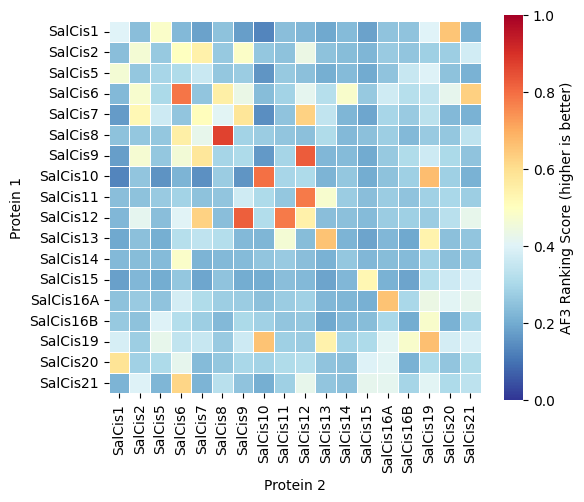

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group and pivot
df_mean = df.groupby(['protein1', 'protein2'])['ranking_score'].mean().reset_index()
heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='ranking_score')

# Desired order
order = ['SalCis1', 'SalCis2', 'SalCis5', 
         'SalCis6', 'SalCis7', 'SalCis8',
         'SalCis9', 'SalCis10', 'SalCis11',
         'SalCis12', 'SalCis13', 'SalCis14', 
         'SalCis15', 'SalCis16A', 'SalCis16B',
         'SalCis19', 'SalCis20', 'SalCis21']

# Reindex both rows and columns
heatmap_data = heatmap_data.reindex(index=order, columns=order)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=False,  cmap='RdYlBu_r',
            linewidths=0.5, center=0.50, vmin=0.0, square=True,vmax=1.0,cbar_kws={'label': 'AF3 Ranking Score (higher is better)'})
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
#plt.tight_layout()
plt.savefig('all_v_all_heatmap_AF3rank.png',transparent=True,dpi=1000)
plt.savefig('all_v_all_heatmap_AF3rank.svg',transparent=True,dpi=1000)

plt.show()


### 

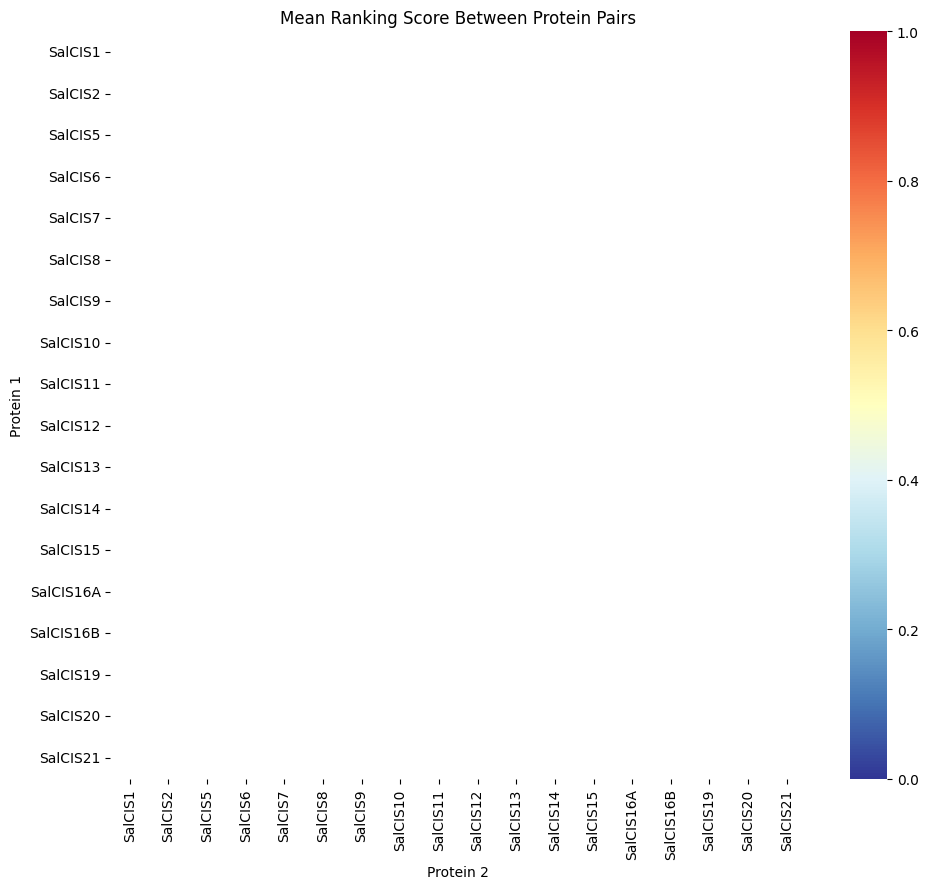

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group and pivot
df_mean = df.groupby(['protein1', 'protein2'])['ranking_score'].mean().reset_index()
heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='ranking_score')

# Desired order
order = ['SalCIS1', 'SalCIS2', 'SalCIS5', 
         'SalCIS6', 'SalCIS7', 'SalCIS8',
         'SalCIS9', 'SalCIS10', 'SalCIS11',
         'SalCIS12', 'SalCIS13', 'SalCIS14', 
         'SalCIS15', 'SalCIS16A', 'SalCIS16B',
         'SalCIS19', 'SalCIS20', 'SalCIS21']

# Reindex both rows and columns
heatmap_data = heatmap_data.reindex(index=order, columns=order)

# Plot
plt.figure(figsize=(10, 9))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='RdYlBu_r',
            linewidths=0.5, center=0.50, vmin=0.0, vmax=1.0)
plt.title("Mean Ranking Score Between Protein Pairs")
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
plt.tight_layout()
plt.show()

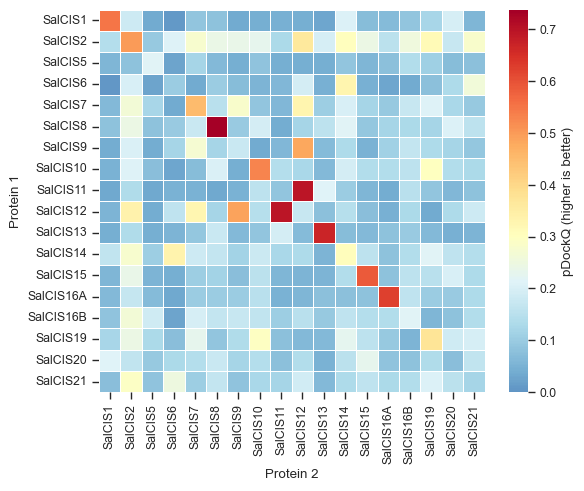

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group and pivot
df_mean = df.groupby(['protein1', 'protein2'])['pdockq'].mean().reset_index()
heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='pdockq')

# Desired order
order = ['SalCIS1', 'SalCIS2', 'SalCIS5', 
         'SalCIS6', 'SalCIS7', 'SalCIS8',
         'SalCIS9', 'SalCIS10', 'SalCIS11',
         'SalCIS12', 'SalCIS13', 'SalCIS14', 
         'SalCIS15', 'SalCIS16A', 'SalCIS16B',
         'SalCIS19', 'SalCIS20', 'SalCIS21']

# Reindex both rows and columns
heatmap_data = heatmap_data.reindex(index=order, columns=order)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data,  cmap='RdYlBu_r', linewidths=0.5,
            center=0.3,vmin=0.0,cbar_kws={'label': 'pDockQ (higher is better)'}
           )
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
plt.tight_layout()
plt.savefig('all_v_all_heatmap_pDockQ.png',transparent=True,dpi=600)
plt.show()


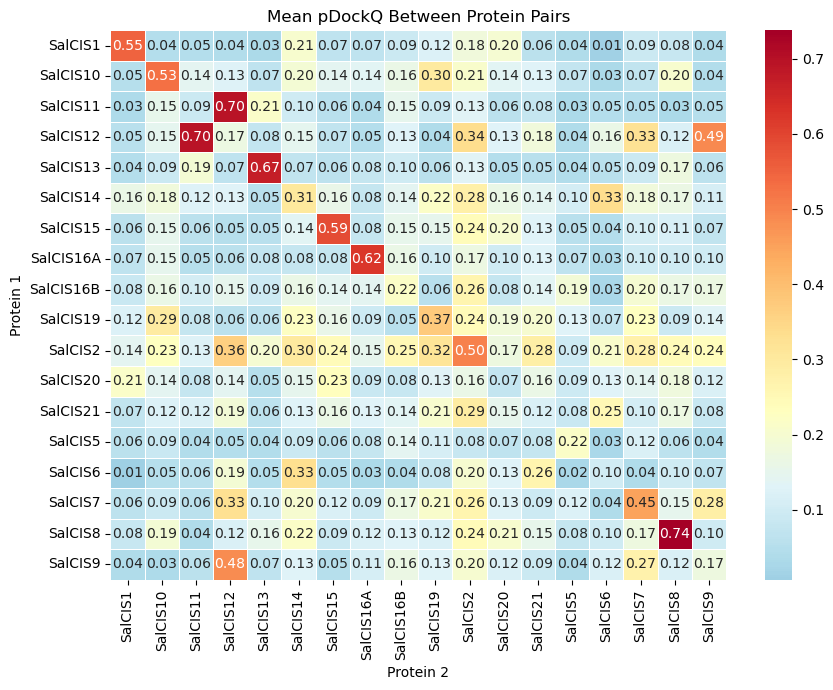

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_mean = df.groupby(['protein1', 'protein2'])['pdockq'].mean().reset_index()

heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='pdockq')

plt.figure(figsize=(9, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='RdYlBu_r', linewidths=0.5,
            center=0.23,vmin=0.0,
           )
plt.title("Mean pDockQ Between Protein Pairs")
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
plt.tight_layout()
plt.show()

In [11]:
df

,Unnamed: 0,main_folder,seed,sample,cif_path,chain_iptm,chain_pair_iptm,chain_pair_pae_min,chain_ptm,fraction_disordered,has_clash,iptm,ptm,ranking_score,pdb_path,pdockq,avg_ipae,protein1,protein2,order_cat
0,2700,salcis1,44,0,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,"[0.07, 0.07]","[[0.64, 0.07], [0.07, 0.66]]","[[0.76, 25.92], [27.92, 0.76]]","[0.64, 0.66]",0.09,0,0.07,0.48,0.20,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,0.018259,26.920,SalCIS1,SalCIS13,SalCIS1
1,2727,salcis1,44,1,./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed...,"[0.21, 0.21]","[[0.56, 0.21], [0.21, 0.38]]","[[0.76, 24.82], [24.96, 0.76]]","[0.56, 0.38]",0.03,0,0.21,0.37,0.25,./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed...,0.211462,24.890,SalCIS1,SalCIS14,SalCIS1
2,2713,salcis1,44,3,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,"[0.05, 0.05]","[[0.63, 0.05], [0.05, 0.66]]","[[0.76, 31.02], [31.22, 0.76]]","[0.63, 0.66]",0.09,0,0.05,0.48,0.18,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,0.000000,31.120,SalCIS1,SalCIS13,SalCIS1
3,2702,salcis1,44,1,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,"[0.06, 0.06]","[[0.61, 0.06], [0.06, 0.67]]","[[0.76, 31.09], [30.82, 0.76]]","[0.61, 0.67]",0.09,0,0.06,0.48,0.19,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,0.257785,30.955,SalCIS1,SalCIS13,SalCIS1
4,2703,salcis1,33,1,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,"[0.06, 0.06]","[[0.56, 0.06], [0.06, 0.65]]","[[0.76, 29.92], [30.78, 0.76]]","[0.56, 0.65]",0.10,0,0.06,0.47,0.19,./SalCIS1/output/SalCIS1_SalCIS13/salcis1/seed...,0.000000,30.350,SalCIS1,SalCIS13,SalCIS1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,5857,salcis21,83,0,./SalCIS21/output/SalCIS21_SalCIS2/salcis21/se...,"[0.17, 0.17]","[[0.6, 0.17], [0.17, 0.89]]","[[0.76, 12.76], [11.92, 0.76]]","[0.6, 0.89]",0.08,0,0.17,0.74,0.33,./SalCIS21/output/SalCIS21_SalCIS2/salcis21/se...,0.079262,12.340,SalCIS21,SalCIS2,SalCIS21
8096,5856,salcis21,10,0,./SalCIS21/output/SalCIS21_SalCIS2/salcis21/se...,"[0.26, 0.26]","[[0.6, 0.26], [0.26, 0.89]]","[[0.76, 13.92], [15.22, 0.76]]","[0.6, 0.89]",0.08,0,0.26,0.73,0.40,./SalCIS21/output/SalCIS21_SalCIS2/salcis21/se...,0.375233,14.570,SalCIS21,SalCIS2,SalCIS21
8097,5855,salcis21,10,1,./SalCIS21/output/SalCIS21_SalCIS2/salcis21/se...,"[0.11, 0.11]","[[0.62, 0.11], [0.11, 0.89]]","[[0.76, 23.95], [25.9, 0.76]]","[0.62, 0.89]",0.08,0,0.11,0.73,0.28,./SalCIS21/output/SalCIS21_SalCIS2/salcis21/se...,0.269662,24.925,SalCIS21,SalCIS2,SalCIS21
8098,5963,salcis21,44,3,./SalCIS21/output/SalCIS21_SalCIS15/salcis21/s...,"[0.43, 0.43]","[[0.58, 0.43], [0.43, 0.57]]","[[0.76, 2.47], [2.54, 0.76]]","[0.58, 0.57]",0.08,0,0.43,0.47,0.48,./SalCIS21/output/SalCIS21_SalCIS15/salcis21/s...,0.131813,2.505,SalCIS21,SalCIS15,SalCIS21


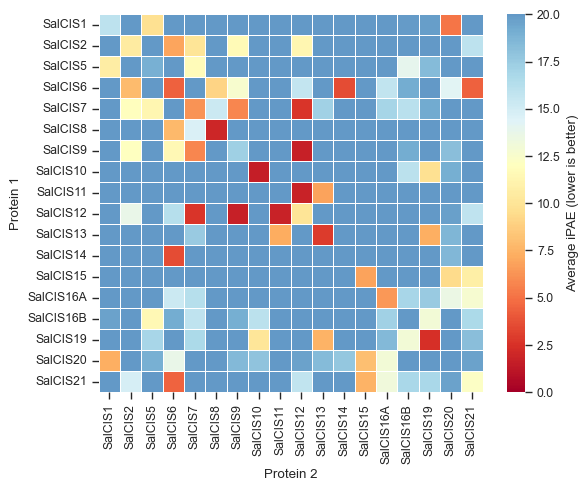

In [101]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_mean = df.groupby(['protein1', 'protein2'])['avg_ipae'].mean().reset_index()

heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='avg_ipae')

# Desired order
order = ['SalCIS1', 'SalCIS2', 'SalCIS5', 
         'SalCIS6', 'SalCIS7', 'SalCIS8',
         'SalCIS9', 'SalCIS10', 'SalCIS11',
         'SalCIS12', 'SalCIS13', 'SalCIS14', 
         'SalCIS15', 'SalCIS16A', 'SalCIS16B',
         'SalCIS19', 'SalCIS20', 'SalCIS21']

# Reindex both rows and columns
heatmap_data = heatmap_data.reindex(index=order, columns=order)

plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, cmap='RdYlBu', linewidths=0.5,
            center=12,vmin=0.0,vmax=20,cbar_kws={'label': 'Average iPAE (lower is better)'},
           )
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
plt.tight_layout()

plt.savefig('all_v_all_heatmap_iPAE.png',transparent=True,dpi=600)
plt.show()

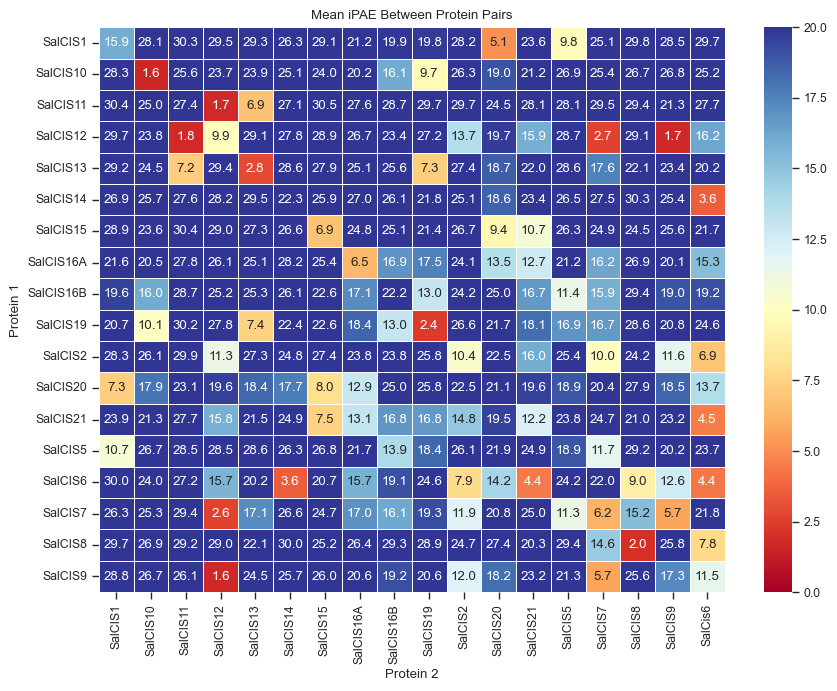

In [29]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_mean = df.groupby(['protein1', 'protein2'])['avg_ipae'].mean().reset_index()

heatmap_data = df_mean.pivot(index='protein1', columns='protein2', values='avg_ipae')

plt.figure(figsize=(9, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='RdYlBu', linewidths=0.5,
            center=10,vmin=0.0,vmax=20,
           )
plt.title("Mean iPAE Between Protein Pairs")
plt.ylabel("Protein 1")
plt.xlabel("Protein 2")
plt.tight_layout()
plt.show()

In [25]:
df.to_excel('SALCIS_AF3_all_v_all_results.xlsx')

In [26]:
plot_df = df[df['protein1']=='SalCIS19']

In [74]:
# Reindex both rows and columns
plot_df = df.reindex(index=order, columns=order)

<Figure size 640x480 with 0 Axes>

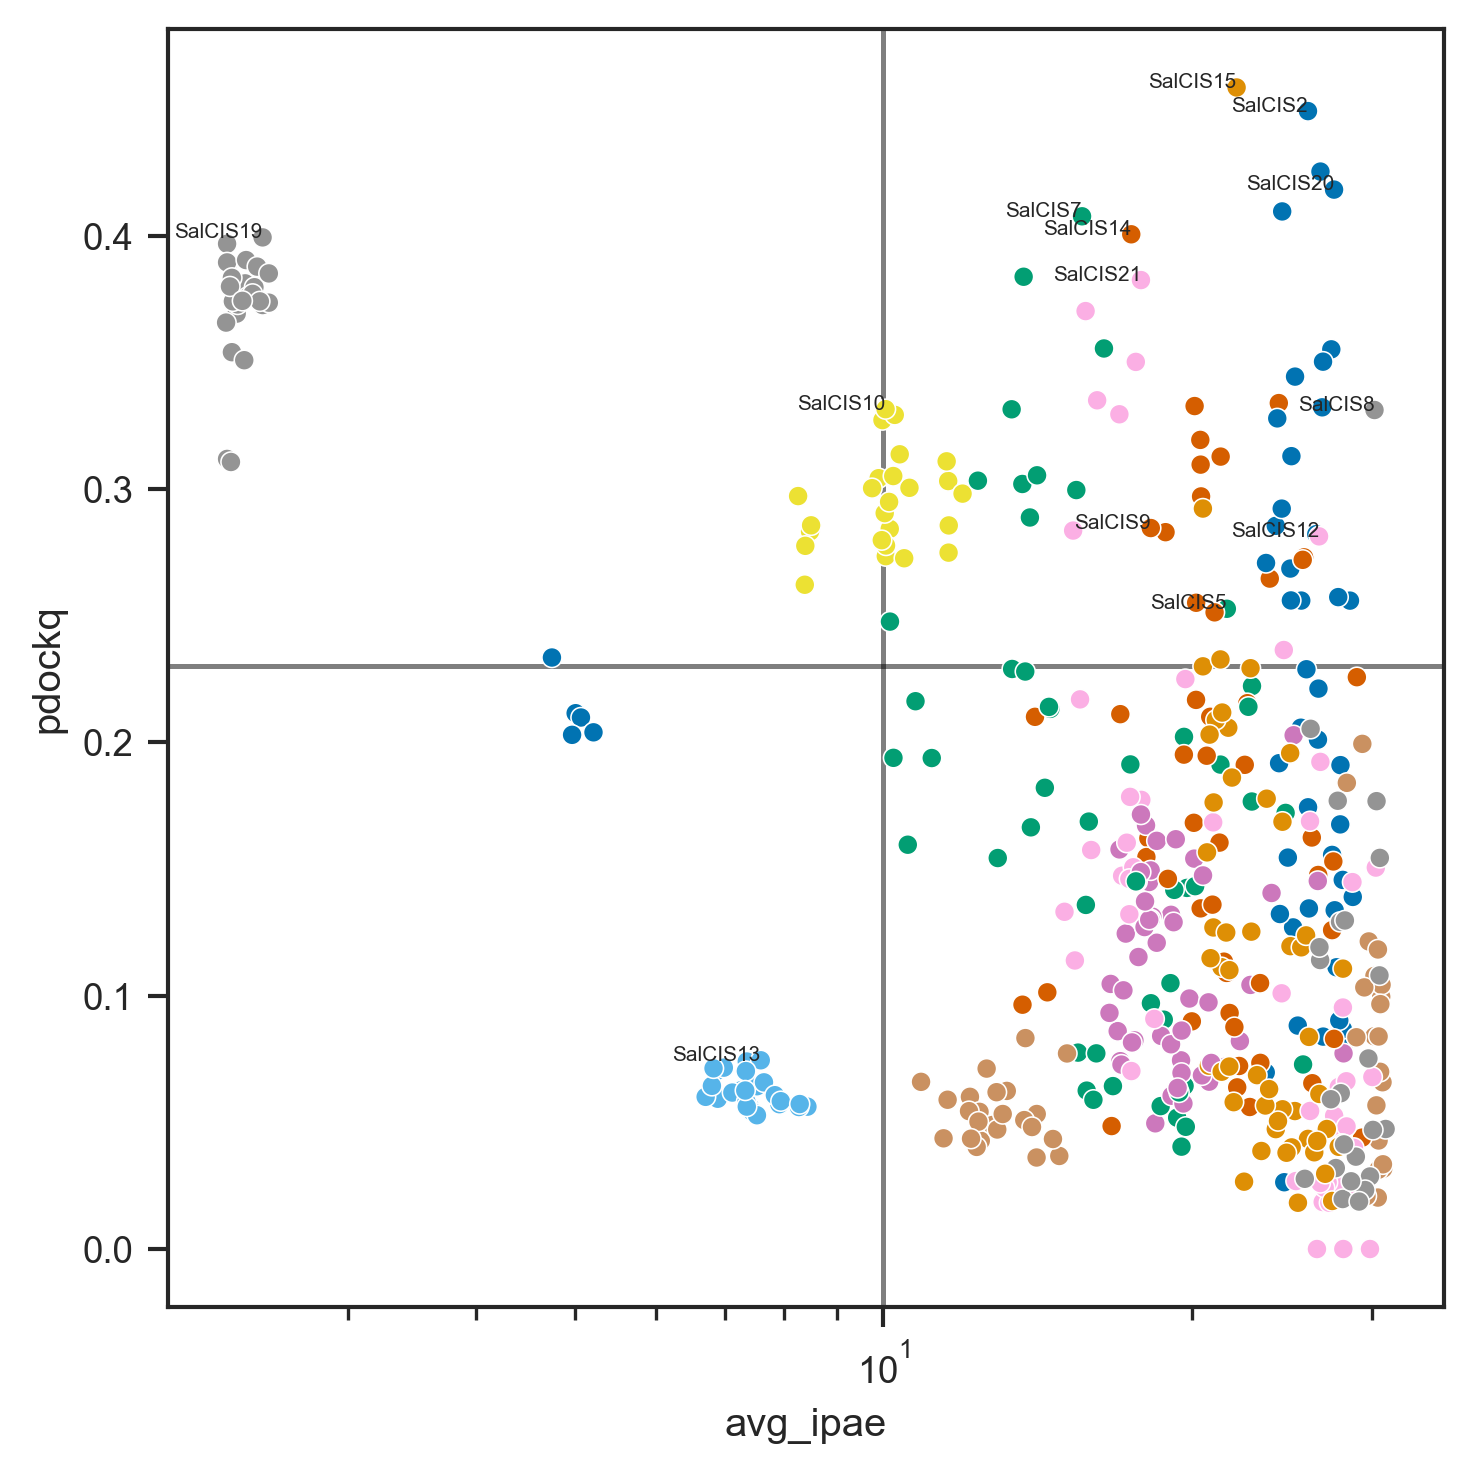

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = df[df['protein1']=='SalCIS19']
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0, (5, 5), dpi=300)

# Scatter plot
scatter = sns.scatterplot(data=plot_df, x='avg_ipae', y='pdockq', hue='protein2',palette='colorblind',legend=None)
plt.axhline(y=0.23,color='k',alpha=0.5,zorder=-1)
plt.axvline(x=10,color='k',alpha=0.5,zorder=-1)
plot_df2 = plot_df.sort_values('pdockq',ascending=False)
plot_df2 = plot_df2.drop_duplicates('protein2')
# Add labels for specific points
for _, row in plot_df2[(plot_df2['pdockq'] > 0.23) | (plot_df2['avg_ipae'] < 12)].iterrows():
    plt.text(row['avg_ipae'], row['pdockq'], row['protein2'], fontsize=5, ha='right')
plt.xscale('log')
plt.tight_layout()
plt.savefig('SalCIS19.png',transparent=True,dpi=600)
plt.show()

<Figure size 640x480 with 0 Axes>

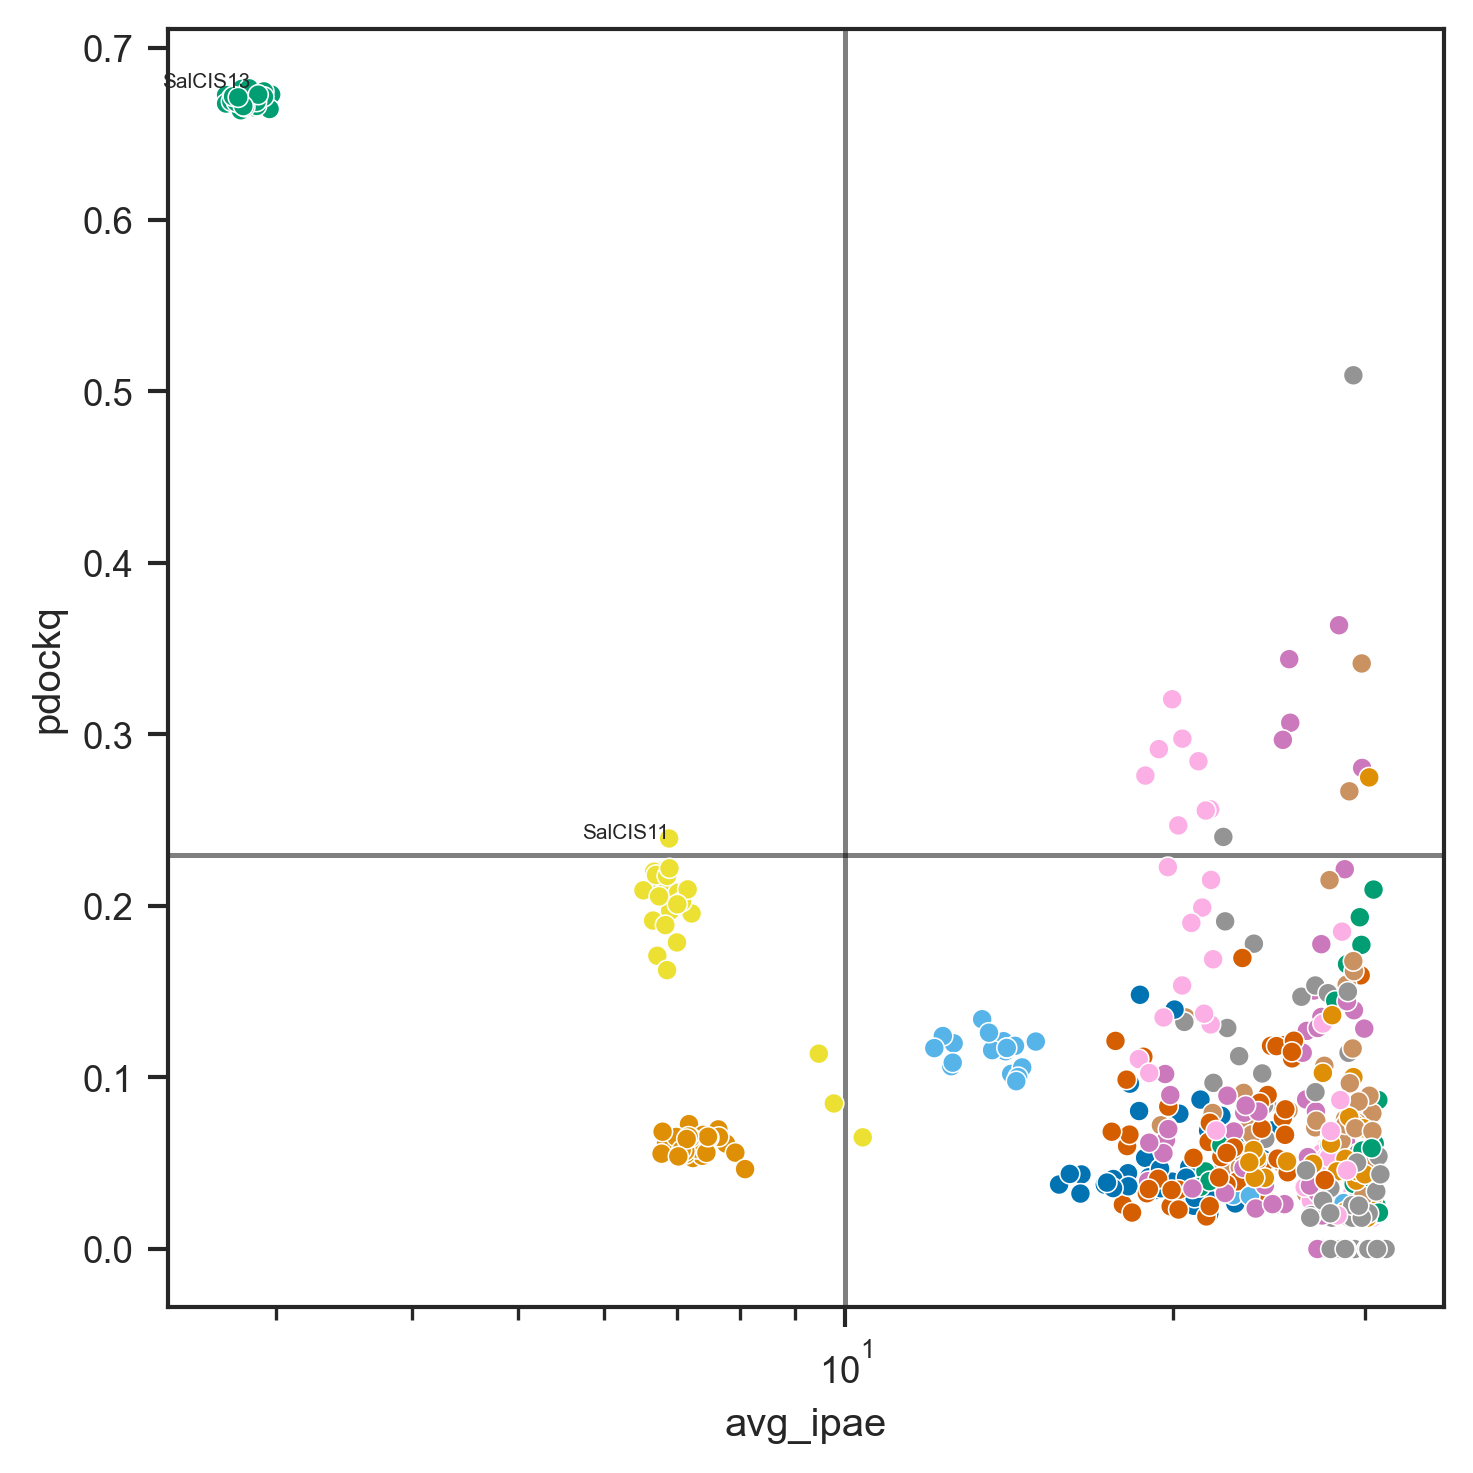

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = df[df['protein1']=='SalCIS13']
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0, (5, 5), dpi=300)

# Scatter plot
scatter = sns.scatterplot(data=plot_df, x='avg_ipae', y='pdockq', hue='protein2',palette='colorblind',legend=None)
plt.axhline(y=0.23,color='k',alpha=0.5,zorder=-1)
plt.axvline(x=10,color='k',alpha=0.5,zorder=-1)
plot_df2 = plot_df.sort_values('pdockq',ascending=False)
plot_df2 = plot_df2.drop_duplicates('protein2')
# Add labels for specific points
for _, row in plot_df2[(plot_df2['pdockq'] > 0.23) & (plot_df2['avg_ipae'] < 12)].iterrows():
    plt.text(row['avg_ipae'], row['pdockq'], row['protein2'], fontsize=5, ha='right')
plt.xscale('log')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

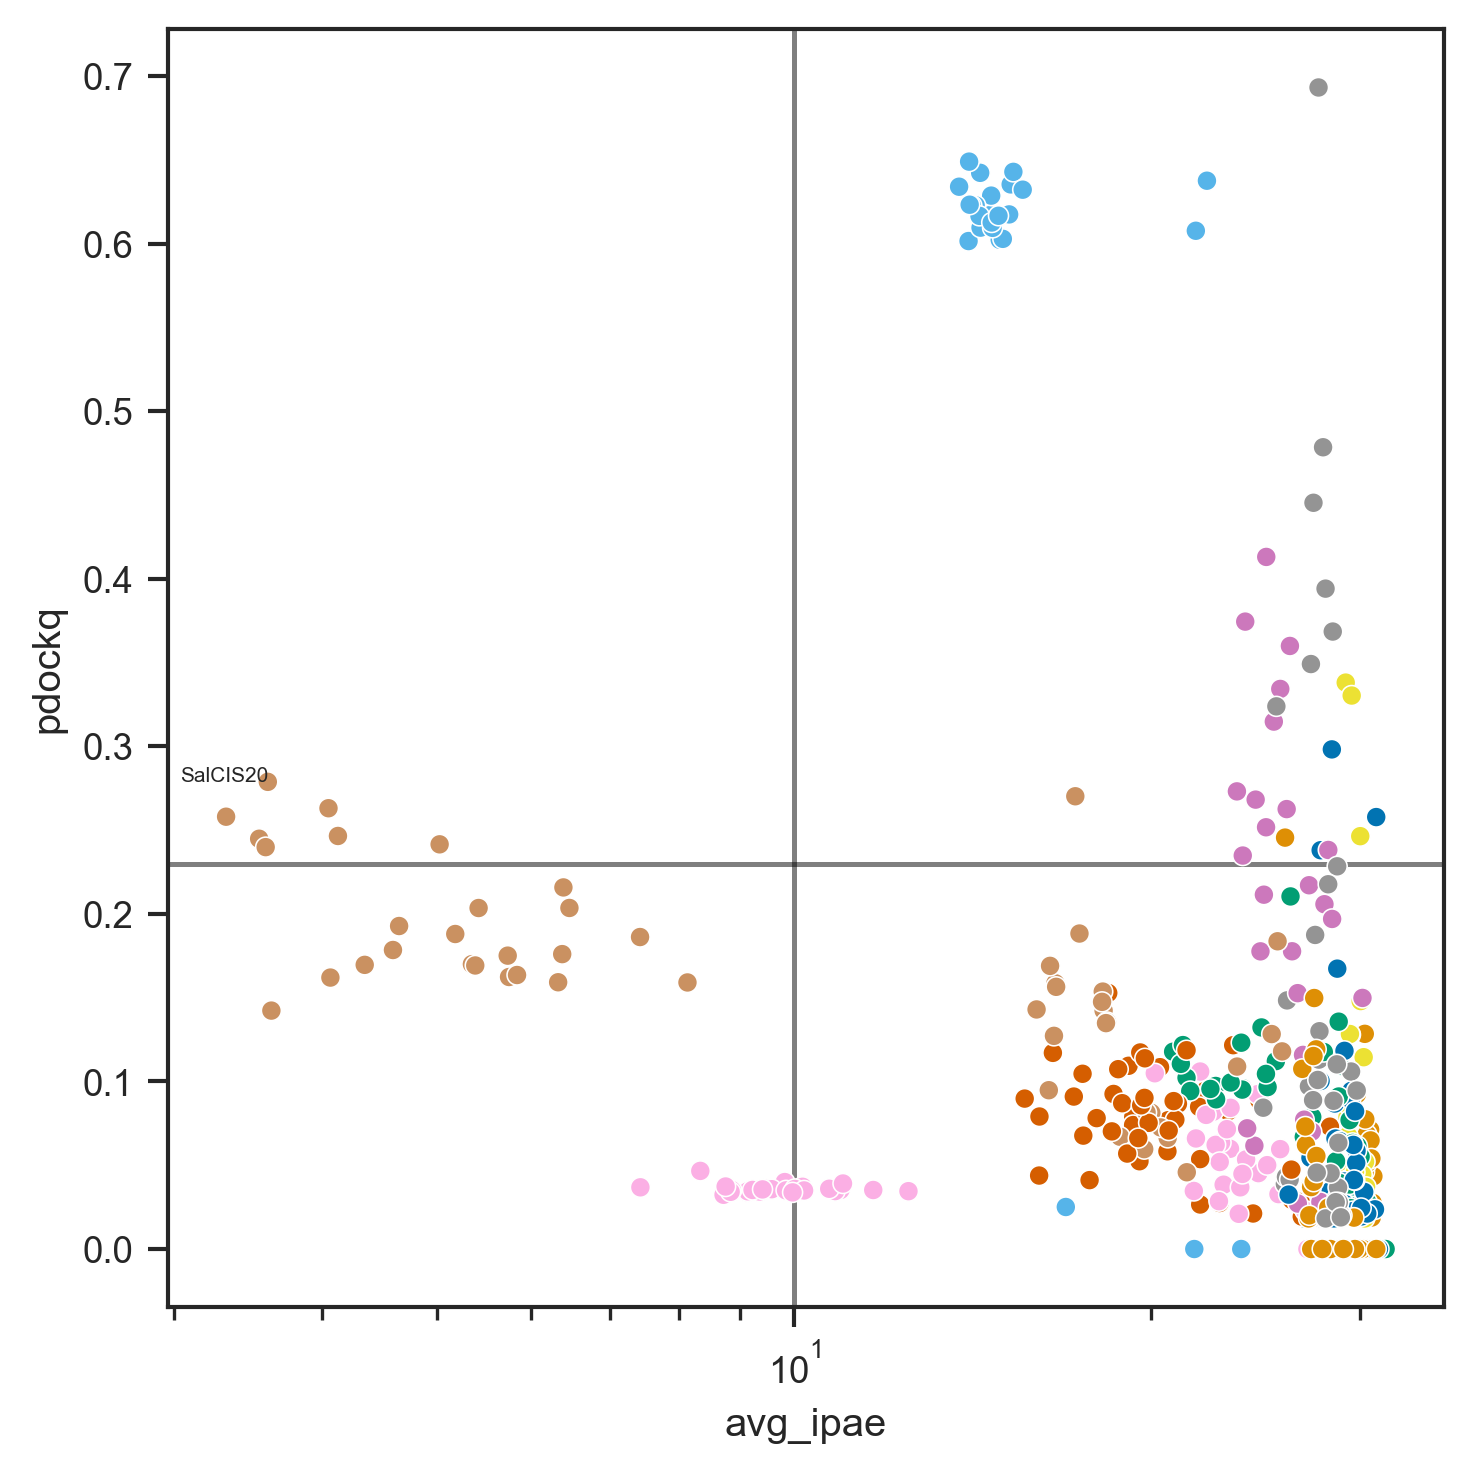

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = df[df['protein1']=='SalCIS1']
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0, (5, 5), dpi=300)

# Scatter plot
scatter = sns.scatterplot(data=plot_df, x='avg_ipae', y='pdockq', hue='protein2',palette='colorblind',legend=None)
plt.axhline(y=0.23,color='k',alpha=0.5,zorder=-1)
plt.axvline(x=10,color='k',alpha=0.5,zorder=-1)
plot_df2 = plot_df.sort_values('pdockq',ascending=False)
plot_df2 = plot_df2.drop_duplicates('protein2')
# Add labels for specific points
for _, row in plot_df2[(plot_df2['pdockq'] > 0.23) & (plot_df2['avg_ipae'] < 12)].iterrows():
    plt.text(row['avg_ipae'], row['pdockq'], row['protein2'], fontsize=5, ha='right')
plt.xscale('log')
plt.tight_layout()
plt.savefig('SalCIS1.png',transparent=True,dpi=600)

plt.show()

<Figure size 640x480 with 0 Axes>

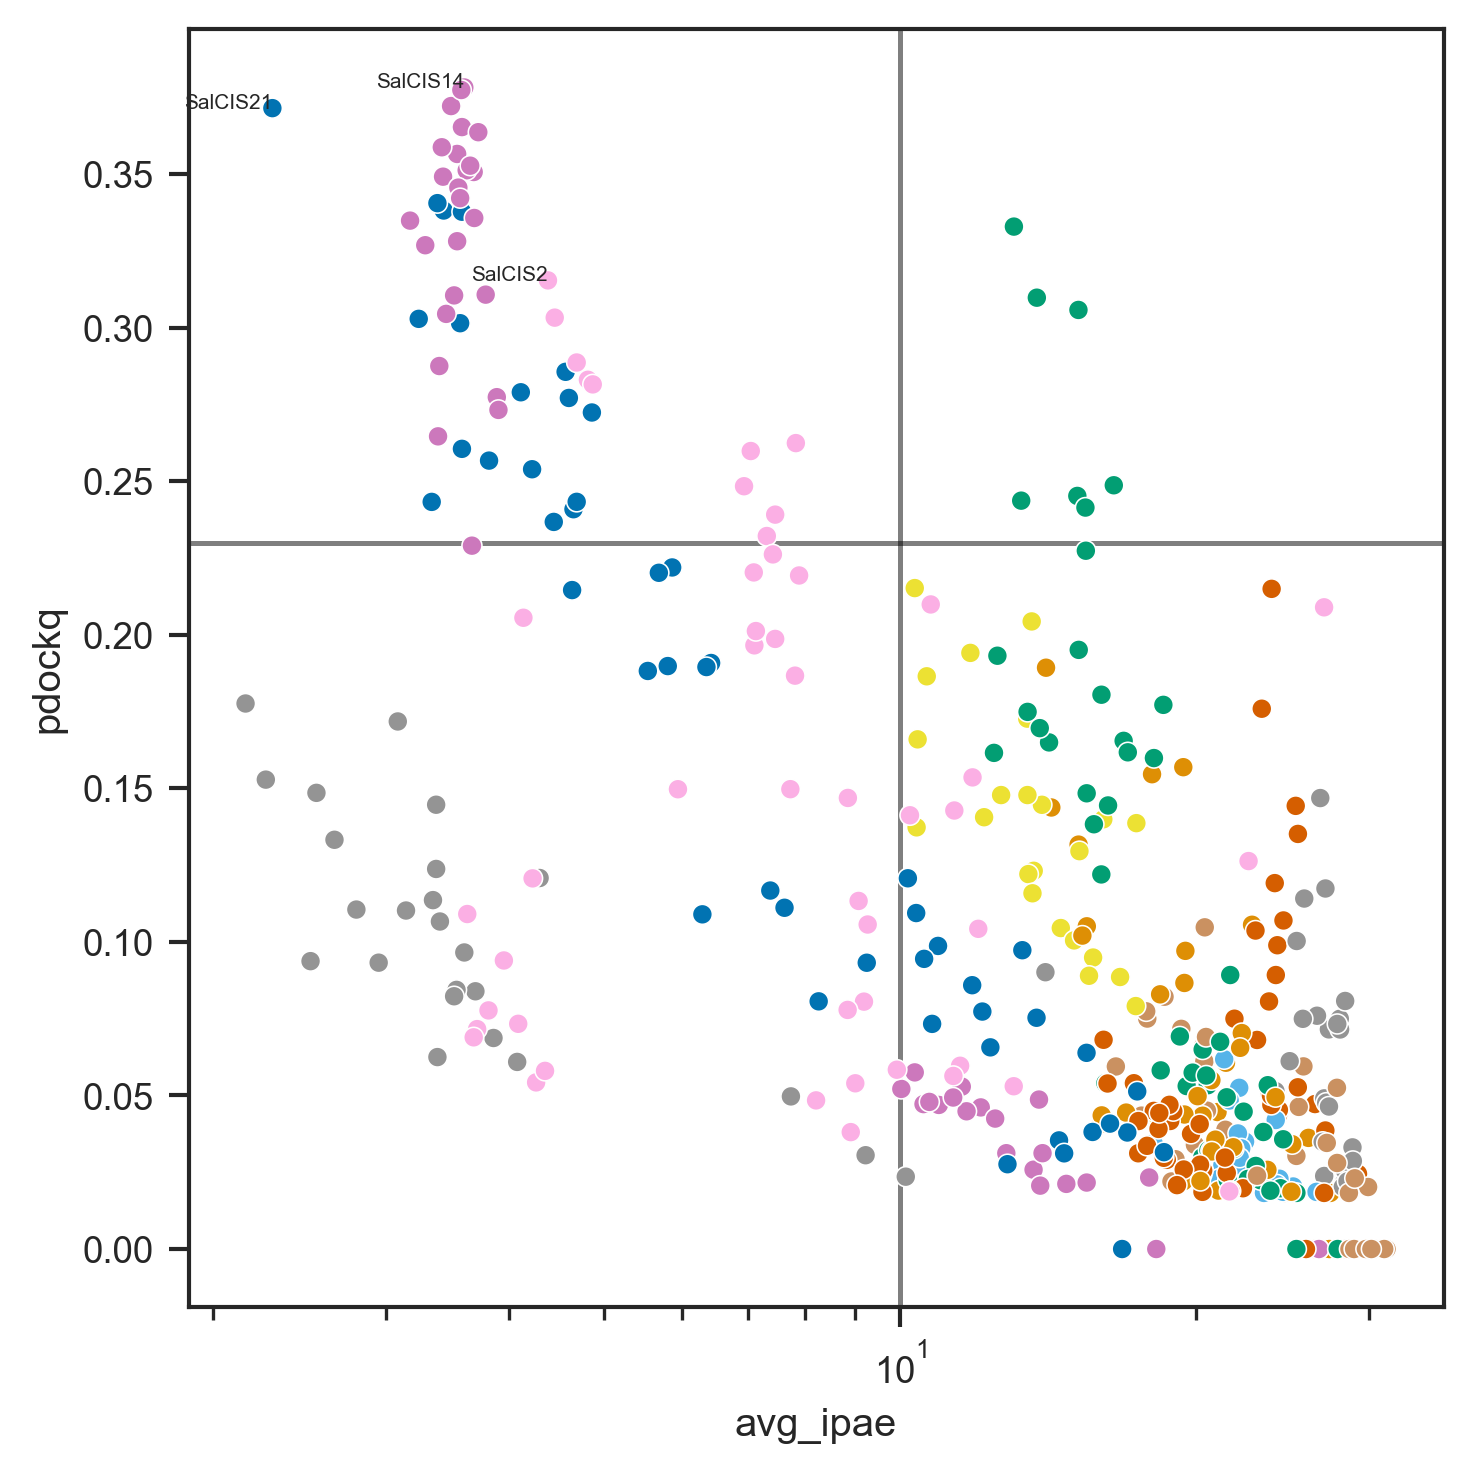

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = df[df['protein1']=='SalCIS6']
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0, (5, 5), dpi=300)

# Scatter plot
scatter = sns.scatterplot(data=plot_df, x='avg_ipae', y='pdockq', hue='protein2',palette='colorblind',legend=None)
plt.axhline(y=0.23,color='k',alpha=0.5,zorder=-1)
plt.axvline(x=10,color='k',alpha=0.5,zorder=-1)
plot_df2 = plot_df.sort_values('pdockq',ascending=False)
plot_df2 = plot_df2.drop_duplicates('protein2')
# Add labels for specific points
for _, row in plot_df2[(plot_df2['pdockq'] > 0.23) & (plot_df2['avg_ipae'] < 12)].iterrows():
    plt.text(row['avg_ipae'], row['pdockq'], row['protein2'], fontsize=5, ha='right')
plt.xscale('log')
plt.tight_layout()
plt.savefig('SalCIS6.png',transparent=True,dpi=600)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = df[df['protein1']=='SalCIS13']
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0, (5, 5), dpi=300)

# Scatter plot
scatter = sns.scatterplot(data=plot_df, x='avg_ipae', y='pdockq', hue='protein2',palette='colorblind',legend=None)
plt.axhline(y=0.23,color='k',alpha=0.5,zorder=-1)
plt.axvline(x=10,color='k',alpha=0.5,zorder=-1)
plot_df2 = plot_df.sort_values('pdockq',ascending=False)
plot_df2 = plot_df2.drop_duplicates('protein2')
# Add labels for specific points
for _, row in plot_df2[(plot_df2['pdockq'] > 0.23) & (plot_df2['avg_ipae'] < 12)].iterrows():
    plt.text(row['avg_ipae'], row['pdockq'], row['protein2'], fontsize=5, ha='right')
plt.xscale('log')
plt.tight_layout()
plt.show()